<a href="https://colab.research.google.com/github/PkwPanu/Model/blob/main/Gradient_tapes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

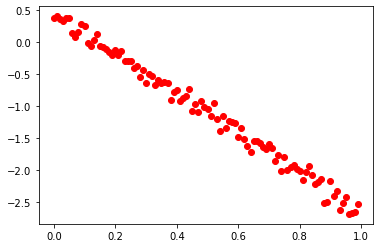

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf


#data points
x_data = np.arange(0,1,0.01)
size= x_data.size
y_data = -3*x_data+0.4+0.1*np.random.randn(size)

plt.plot(x_data,y_data,'ro')


In [ ]:
W = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
lr=0.1
for epoch in range(500):
  with tf.GradientTape() as t:
    Y = W*x_data+b
    loss = tf.reduce_mean((Y-y_data)**2)
  dW,db = t.gradient(loss,[W,b])
  W.assign_sub(lr*dW)
  b.assign_sub(lr*db)
  print(epoch,W.numpy(),b.numpy(),loss.numpy())

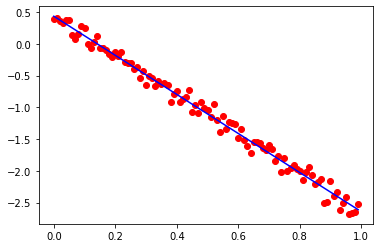

In [ ]:
Prediction = W*x_data+b
plt.plot(x_data,y_data,'ro')
plt.plot(x_data,Prediction,'b-')


Non-linear

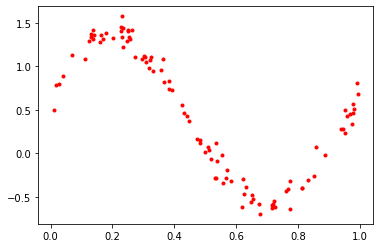

In [ ]:
#data point
#x_data = np.arange(0,1,0.01)
#size = x_data.size

size=100
x_data = np.random.rand(size,1)
y_data = np.sin(2*np.pi*x_data+0.3)+0.4 + 0.1*np.random.randn(size,1)

plt.plot(x_data,y_data,'r.')


In [ ]:
# mode
W1 = tf.Variable(np.random.rand(1,10))
W2 = tf.Variable(np.random.rand(10,10))
W3 = tf.Variable(np.random.rand(10,1))
b1 = tf.Variable(np.random.rand(10))
b2 = tf.Variable(np.random.rand(10))
b3 = tf.Variable(np.random.rand(1))

lr =8e-2

def relu(x):
  return tf.where(x>0,x,0)

for epoch in range (7000):
  with tf.GradientTape() as t:
    Y = tf.math.tanh(x_data @ W1 + b1)
    Y = tf.math.tanh(Y @ W2 +b2)
    Y = Y @ W3 +b3
    loss = tf.reduce_mean((Y-y_data)**2)
  dW1,db1,dW2,db2,dW3,db3=t.gradient(loss,[W1,b1,W2,b2,W3,b3])
  W1.assign_sub(lr*dW1)
  W2.assign_sub(lr*dW2)
  W3.assign_sub(lr*dW3)
  b1.assign_sub(lr*db1)
  b2.assign_sub(lr*db2)
  b3.assign_sub(lr*db3)
  if(epoch%200==0):
    print(epoch,loss.numpy())

0 40.954557215298166
200 0.12085308101161299
400 0.057469281790128425
600 0.0500654528766532
800 0.041831995623623684
1000 0.028462566551489498
1200 0.02070540765568943
1400 0.016050835493287882
1600 0.013392089616073775
1800 0.01183605357763354
2000 0.010875385193103071
2200 0.010253080075998679
2400 0.00983530966144517
2600 0.009547611293144189
2800 0.009345666473211634
3000 0.009201599562066301
3200 0.009097165239913673
3400 0.009020103059034503
3600 0.008962039795479819
3800 0.008917204521269284
4000 0.008881601890338334
4200 0.008852461045318637
4400 0.00882785963392962
4600 0.008806463875623505
4800 0.00878734781652782
5000 0.008769867572136334
5200 0.008753574065274869
5400 0.008738152750901866
5600 0.008723382201149227
5800 0.008709105794630146
6000 0.008695212445177554
6200 0.008681623518334307
6400 0.008668283951778684
6600 0.008655156211721094
6800 0.008642216149509429


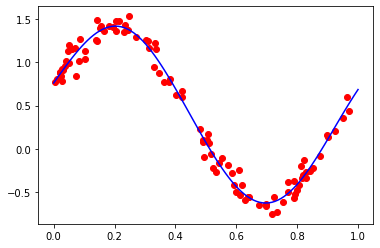

In [ ]:
x_test=np.linspace(0,1,size).reshape(size,1)
Prediction = tf.math.tanh(x_test @ W1 + b1)
Prediction = tf.math.tanh(Prediction @ W2 +b2)
Prediction = Prediction @ W3   +b3
plt.plot(x_data,y_data,'ro')
plt.plot(x_test,Prediction,'b-')

Gradient Tapes with Class

In [ ]:
def relu(x):
  return tf.where(x>0,x,0)
def linear(x):
  return x

class MutiLayerP():
  def __init__(self, neurons= [1,10,10,1], activation = [relu, relu, linear]) :
    self.W = []
    self.activation = activation 
    for i in range(1,len(neurons)):
      self.W.append(tf.Variable(np.random.randn(neurons[i-1], neurons[i]),dtype=tf.float32))
      self.W.append(tf.Variable(np.random.randn(neurons[i]),dtype=tf.float32)) 
  def __call__(self, x):
    for i in range(0,len(self.W),2):
      x = x @ self.W[i] + self.W[i+1]
      x = self.activation[i//2](x)
    return x

  def fit(self,x,y,lr=1e-4,epochs=1000):
    for epoch in range(1,epochs+1):
        with tf.GradientTape() as t:
          loss = tf.reduce_mean((model(x)-y)**2)
        dW = t.gradient(loss,model.W)
        for i, W in enumerate(model.W):
          W.assign_sub(lr*dW[i])
        if epoch % 500 == 0:
          print('epoch:',epoch,' loss =',loss.numpy())  

In [ ]:
model = MutiLayerP(neurons= [1,5,1], activation = [ tf.math.tanh, linear])   #layer [1 input// hidden layers// 1 output]
model.fit(x=x_data,y=y_data,lr=8e-2,epochs=7000)

epoch: 500  loss = 0.18953934
epoch: 1000  loss = 0.10339918
epoch: 1500  loss = 0.035684433
epoch: 2000  loss = 0.020696545
epoch: 2500  loss = 0.018347146
epoch: 3000  loss = 0.017609589
epoch: 3500  loss = 0.01711936
epoch: 4000  loss = 0.016845621
epoch: 4500  loss = 0.01654968
epoch: 5000  loss = 0.017910516
epoch: 5500  loss = 0.015865875
epoch: 6000  loss = 0.015433123
epoch: 6500  loss = 0.015115613
epoch: 7000  loss = 0.0149527965


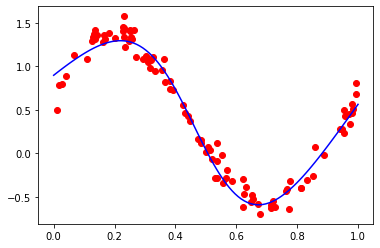

In [ ]:
x_test=np.linspace(0,1,size).reshape(size,1)

Prediction = model(x_test)

plt.plot(x_data,y_data,'ro')
plt.plot(x_test,Prediction,'b-')
plt.show()